# Explore here

In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import numpy as np

# load the .env file variables
load_dotenv()



True

In [2]:


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

dy_uri = "4VMYDCV2IEDYJArk749S6m"
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
results = spotify.artist_top_tracks(dy_uri)
#albums = results['items']

In [3]:
tracks = results["tracks"][5]
tracks

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/47MpMsUfWtgyIIBEFOr4FE'},
    'href': 'https://api.spotify.com/v1/artists/47MpMsUfWtgyIIBEFOr4FE',
    'id': '47MpMsUfWtgyIIBEFOr4FE',
    'name': 'Lunay',
    'type': 'artist',
    'uri': 'spotify:artist:47MpMsUfWtgyIIBEFOr4FE'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
   'KW

In [4]:
tracks.keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [5]:
# keep the name of the song, the popularity and the duration (in minutes).

popularity = tracks["popularity"]
name = tracks["name"]
duration_min = tracks["duration_ms"]*(1/60e3) # convert to minutes

In [6]:
duration_min

4.4347666666666665

In [7]:
results['tracks'][5]['name']

'Soltera (Remix)'

In [6]:
name = []
pop = []
duration = []
dict_ = {"Name":name,
         "Popularity":pop,
         "Duration (min)":duration}
for i in range(10):
   

    name.append(results['tracks'][i]['name'])
    pop.append(results['tracks'][i]['popularity'])
    duration.append(round(results['tracks'][i]['duration_ms']*(1/60e3),2))

In [7]:
df = pd.DataFrame(dict_,index=range(1,11)).sort_values(by=['Popularity'],ascending=False)
df

,Name,Popularity,Duration (min)
1,Gasolina,76,3.21
2,Despacito,75,3.82
3,La Santa,75,3.44
5,Con Calma,74,3.22
4,"Lo Que Pasó, Pasó",72,3.52
6,Soltera (Remix),72,4.43
7,Limbo,72,3.74
8,Vuelve,72,4.66
10,Rompe,71,3.14
9,Tu Príncipe,70,3.43


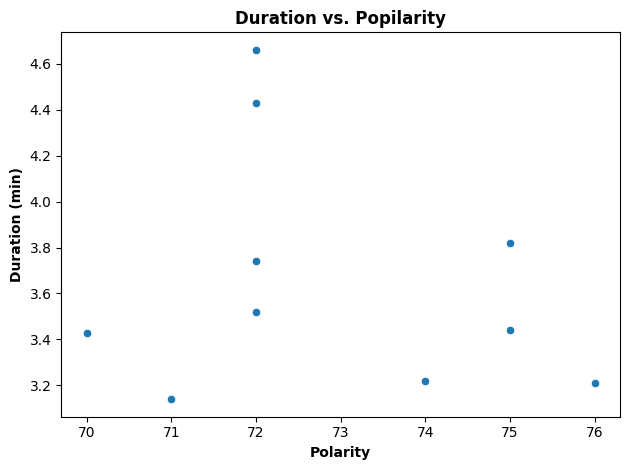

,Popularity,Duration (min)
Popularity,1.000000,-0.205875
Duration (min),-0.205875,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(df,x="Popularity",y="Duration (min)")
plt.xlabel("Polarity",fontweight = 'bold')
plt.ylabel("Duration (min)",fontweight='bold')
plt.title("Duration vs. Popilarity",fontweight='bold')
plt.tight_layout()
plt.show()
df[['Popularity','Duration (min)']].corr()



#### From the Scatterplot and correlation coefficient, there is no apparent correlation between the two quantities ####